In [1]:
# dependencies
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns
import copy
import pandas as pd

sns.set()
# sns.set_style("dark")
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
# mpl.rcParams['lines.linewidth'] = 3

# insert path to data
data_path = '../data/'

## Data from 'datasets/covid-19'

In [2]:
# read data
df1 = pd.read_csv(data_path + 'datasets/time-series-19-covid-combined.csv')
print(df1.head(5))

         Date Country/Region Province/State   Lat  Long  Confirmed  Recovered  \
0  2020-01-22    Afghanistan            NaN  33.0  65.0        0.0        0.0   
1  2020-01-23    Afghanistan            NaN  33.0  65.0        0.0        0.0   
2  2020-01-24    Afghanistan            NaN  33.0  65.0        0.0        0.0   
3  2020-01-25    Afghanistan            NaN  33.0  65.0        0.0        0.0   
4  2020-01-26    Afghanistan            NaN  33.0  65.0        0.0        0.0   

   Deaths  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [3]:
# list confirmed cases of one country
def get_country_data_1(df, country):
    
    d1 = df['Date']
    d2 = df['Country/Region']
    d3 = df['Confirmed']
      
    #     print(d1.head(5))
    #     print(d2.head(5))
    
    a = []
    b = []
    c = []
    d = []
    counter = -1
    for i in range(len(d1)):
        if str(d2[i]) == country:
            
            if float(d3[i]) > 0.:
                counter += 1
            
            
            a.append(counter)
            b.append(d1[i])
            c.append(country)
            d.append(float(d3[i]))
              
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    d = np.array(d)
    data = [a, b, c, d]
    data = np.array(data)
    dd = pd.DataFrame(data.T, columns=['day', 'date', 'country', 'cases'])
    return dd

# list confirmed cases of one country
def get_confirmed_1(df, country):
    
    d1 = df['Date']
    d2 = df['Country/Region']
    d3 = df['Confirmed']
    a = []
    b = []
    c = []
    d = ''
    counter = -1
    for i in range(len(d1)):
        if str(d2[i]) == country:
            
            if float(d3[i]) > 0.:
                counter += 1
                c.append(counter)
                a.append(d1[i])
                b.append(float(d3[i]))
            if counter == 0:
                d = str(d1[i])
              
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    return a, b, c, d

In [4]:
# India data
cases_ind1 = get_country_data_1(df1, 'India')
cases_ind1

,day,date,country,cases
0,-1,2020-01-22,India,0.0
1,-1,2020-01-23,India,0.0
2,-1,2020-01-24,India,0.0
3,-1,2020-01-25,India,0.0
4,-1,2020-01-26,India,0.0
...,...,...,...,...
79,71,2020-04-10,India,7598.0
80,72,2020-04-11,India,8446.0
81,73,2020-04-12,India,9205.0
82,74,2020-04-13,India,10453.0


In [5]:
# US data
cases_us1 = get_country_data_1(df1, 'US')
cases_us1

,day,date,country,cases
0,0,2020-01-22,US,1.0
1,1,2020-01-23,US,1.0
2,2,2020-01-24,US,2.0
3,3,2020-01-25,US,2.0
4,4,2020-01-26,US,5.0
...,...,...,...,...
79,79,2020-04-10,US,496535.0
80,80,2020-04-11,US,526396.0
81,81,2020-04-12,US,555313.0
82,82,2020-04-13,US,580619.0


In [6]:
# Italy data
cases_it1 = get_country_data_1(df1, 'Italy')
cases_it1

,day,date,country,cases
0,-1,2020-01-22,Italy,0.0
1,-1,2020-01-23,Italy,0.0
2,-1,2020-01-24,Italy,0.0
3,-1,2020-01-25,Italy,0.0
4,-1,2020-01-26,Italy,0.0
...,...,...,...,...
79,70,2020-04-10,Italy,147577.0
80,71,2020-04-11,Italy,152271.0
81,72,2020-04-12,Italy,156363.0
82,73,2020-04-13,Italy,159516.0


In [7]:
# plot data
def plot_countries_1(df, countries):
    
    n = len(countries)
    fig = plt.figure(figsize=(20., 20.))
    axes = fig.subplots(nrows=n, ncols=1)
    
    for i in range(n):
        
        a,b,c,d = get_confirmed(df, countries[i])
        axes[i].plot(c, b, label='Country: {}, Start date: {}'.format(countries[i], d))
        
        axes[i].set_title(countries[i])                            
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Confirmed cases')
        axes[i].legend()
        
        
    plt.show() 
    
# plot data
def plot_countries_all_1(df, countries):
    
    n = len(countries)
    fig = plt.figure(figsize=(20., 20.))
    
    for i in range(n):
        
        a,b,c,d = get_confirmed_1(df, countries[i])
        plt.plot(c, b, label='Country: {}, Start date: {}'.format(countries[i], d))
        
        plt.title('Confirmed cases for different countries')                            
        plt.xlabel('Day')
        plt.ylabel('Confirmed cases')
        
        plt.legend(prop={'size': 40})
        
        
    plt.show() 

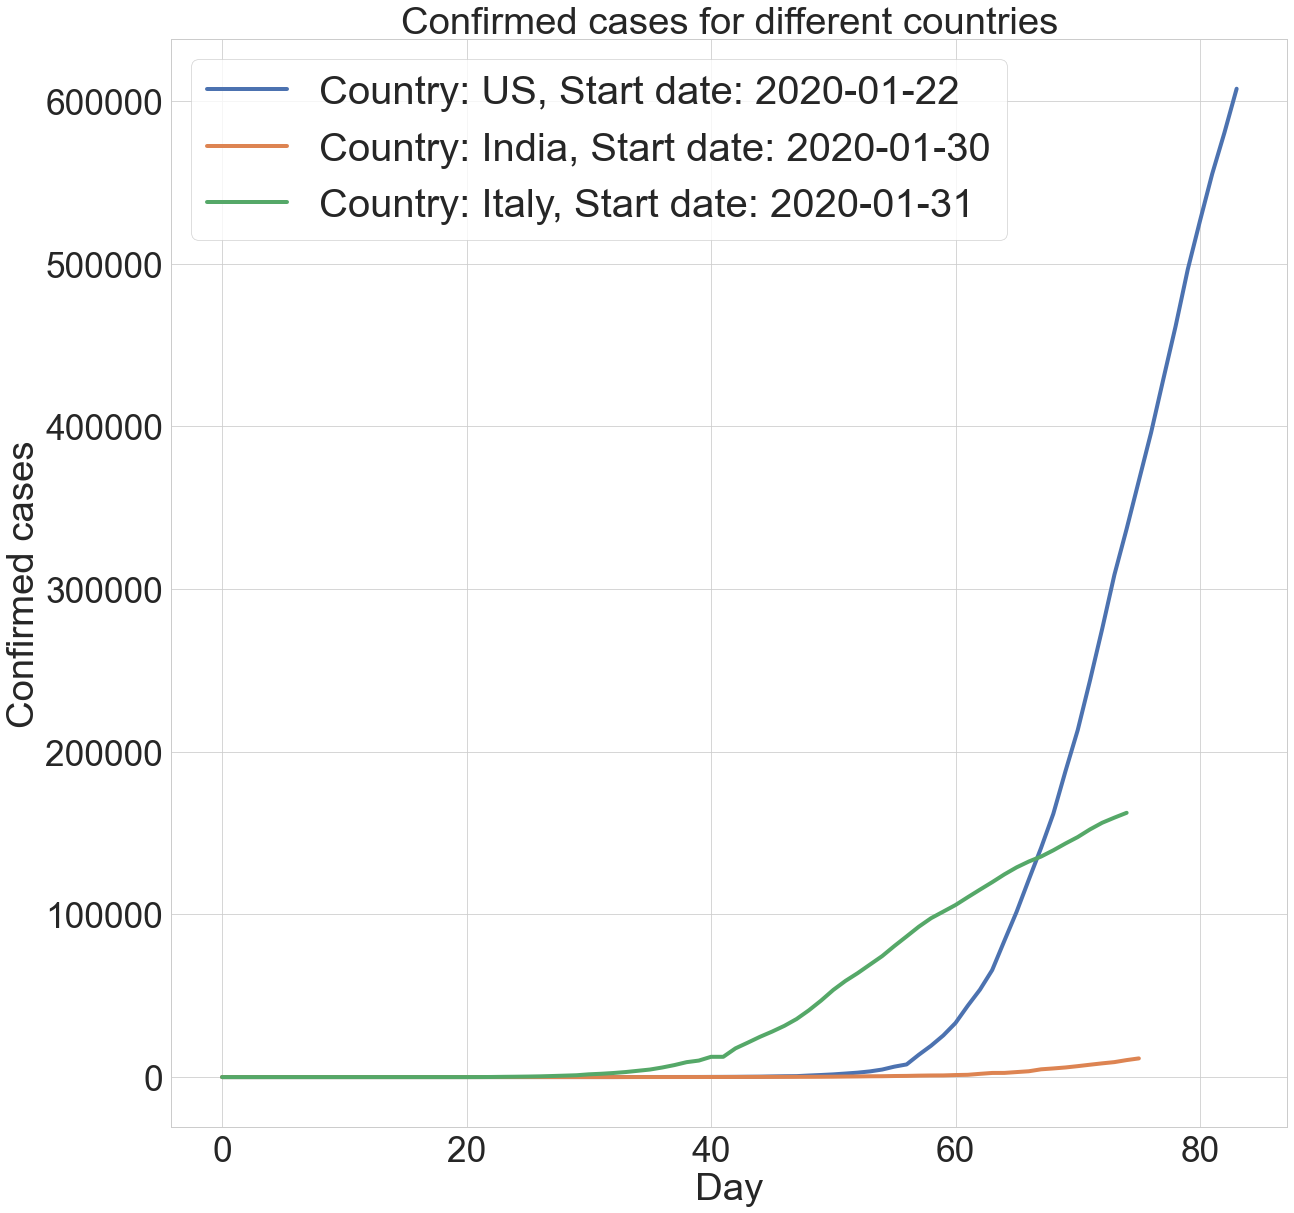

In [8]:
plot_countries_all_1(df1, ['US', 'India', 'Italy'])

## Data from 'CSSEGISandData/COVID-19'

In [9]:
# read data
df2 = pd.read_csv(data_path + 'csse/time_series_covid19_confirmed_global.csv')
df2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,349,367,423,444,484,521,555,607,665,714
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,361,377,383,400,409,416,433,446,467,475
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,501,525,545,564,583,601,601,638,646,659
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,14,16,17,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,1,1,2,2,3,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,4,4,4,4,4,4,4,4,4


In [10]:
print(df2.iloc[10][1])
print(df2.iloc[30][1])
print(df2.iloc[100][1])

Australia
Bulgaria
Equatorial Guinea


In [11]:
Nrows = 264
Ncols = 88

def find_row_2(df, country):
    for i in range(Nrows):
        a = df.iloc[i][1]
        
        if a == country:
            
            return i

In [12]:
# get data for India
cases_ind2 = df2.iloc[find_row_2(df2, 'India')]
cases_ind2

Province/State      NaN
Country/Region    India
Lat                  21
Long                 78
1/22/20               0
                  ...  
4/10/20            7598
4/11/20            8446
4/12/20            9205
4/13/20           10453
4/14/20           11487
Name: 131, Length: 88, dtype: object

In [15]:
def get_array_2(d):
    a = []
    for i in range(Ncols-2):
        a.append(int(d[i+2]))
        
    return np.array(a)


# plot data
def plot_countries_all_2(df, countries):
    
    n = len(countries)
    fig = plt.figure(figsize=(20., 20.))
    
    for i in range(n):
        
        a = df.iloc[find_row_2(df, countries[i])]
        b = get_array_2(a)
        
        plt.plot(b, label='Country: {}'.format(countries[i]))
        
        plt.title('Confirmed cases for different countries')                            
        plt.xlabel('Day')
        plt.ylabel('Confirmed cases')
        
        plt.legend(prop={'size': 40})
        
        
    plt.show() 

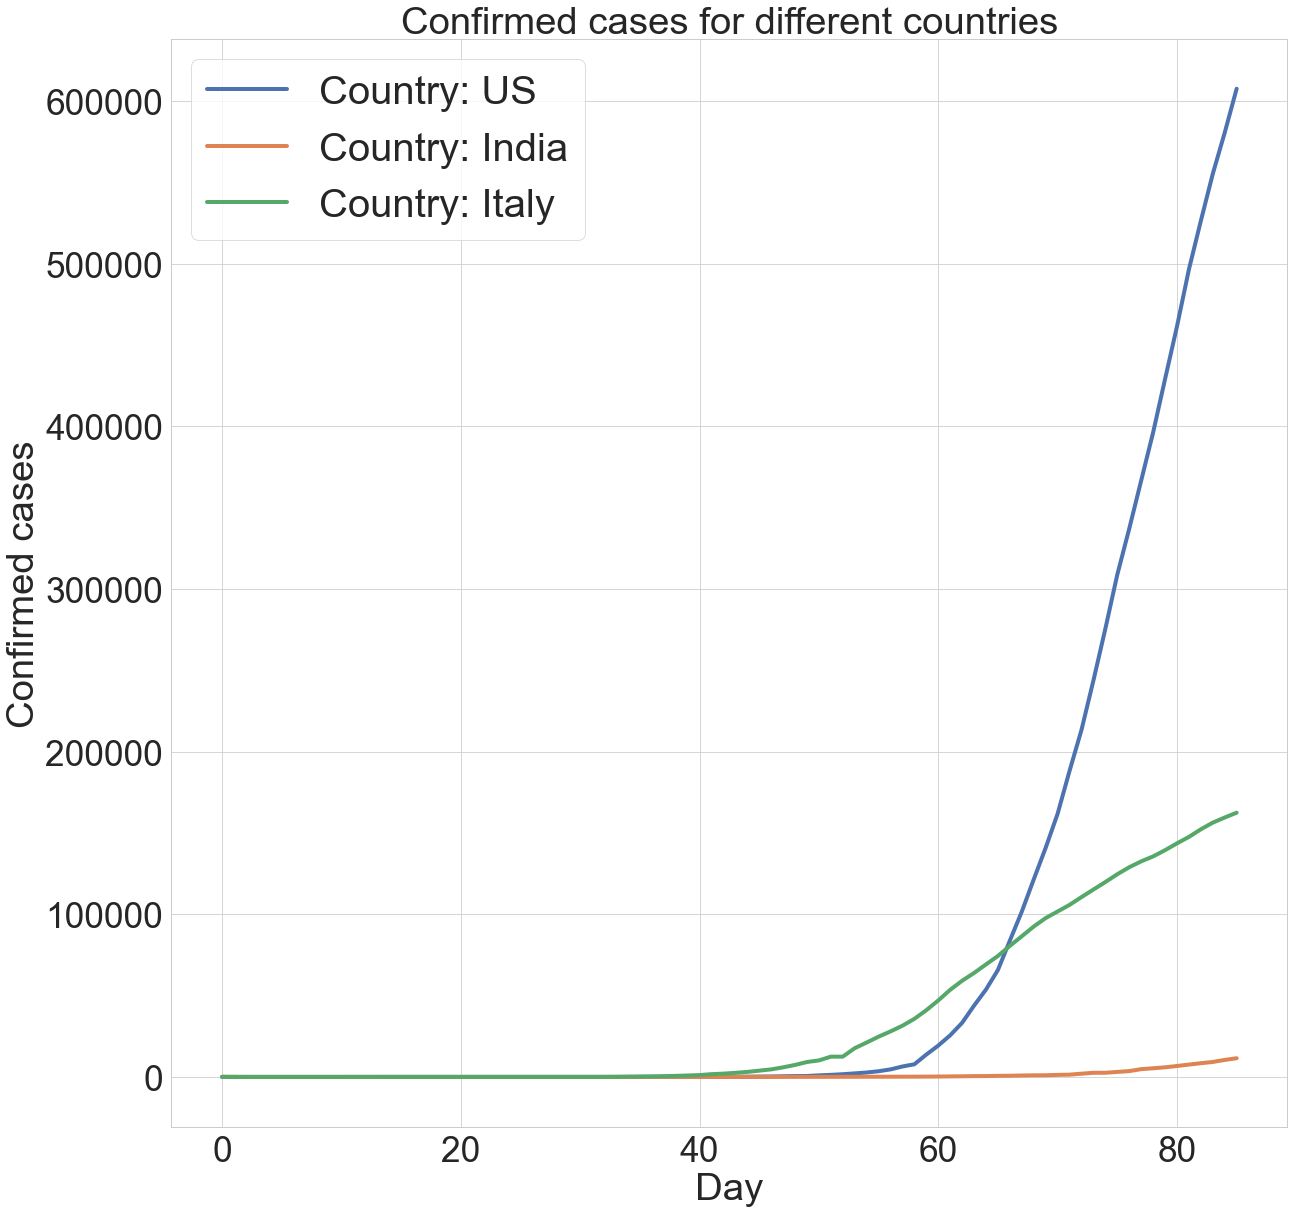

In [16]:
plot_countries_all_2(df2, ['US', 'India', 'Italy'])